In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler   #for scaling numerical features to a range between 0 nd 1
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from torchvision import transforms


In [39]:
#load
df = pd.read_csv("/content/drive/MyDrive/predict maint/predictive_maintenance.csv")

In [40]:
#print number of missing values in each column
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [41]:
#drop rows with missing values
df = df.dropna()

In [42]:
#drop duplicate rows
df = df.drop_duplicates()

In [43]:
#remove Non meaningful columns
df = df.drop(columns=['UDI', 'Product ID', 'Target'])


In [44]:
df.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [45]:
#Select Numerical Columns for Normalization:
numerical_cols = df.select_dtypes(include=[np.number]).columns



In [46]:
#Normalize Numerical Features between 0 nd 1
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [47]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,0.304348,0.358025,0.222934,0.535714,0.000000,No Failure
1,L,0.315217,0.370370,0.139697,0.583791,0.011858,No Failure
2,L,0.304348,0.345679,0.192084,0.626374,0.019763,No Failure
3,L,0.315217,0.358025,0.154249,0.490385,0.027668,No Failure
4,L,0.315217,0.370370,0.139697,0.497253,0.035573,No Failure
...,...,...,...,...,...,...,...
9995,M,0.380435,0.333333,0.253783,0.353022,0.055336,No Failure
9996,H,0.391304,0.333333,0.270081,0.384615,0.067194,No Failure
9997,M,0.402174,0.358025,0.277648,0.406593,0.086957,No Failure
9998,H,0.402174,0.370370,0.139697,0.614011,0.098814,No Failure


In [48]:
df.shape

(10000, 7)

In [49]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [50]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,-0.952389,-0.947360,0.068185,0.282200,-1.695984,No Failure
1,L,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,No Failure
2,L,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,No Failure
3,L,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,No Failure
4,L,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,No Failure


In [51]:
#statistics for numerical columns
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-2.501110e-16,3.979039e-16,-6.181722e-17,-2.362555e-16,-2.643219e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-2.352278e+00,-2.901986e+00,-2.068196e+00,-3.630149e+00,-1.695984e+00
25%,-8.523974e-01,-8.125581e-01,-6.458012e-01,-6.808401e-01,-8.633176e-01
50%,4.753123e-02,6.365340e-02,-1.995597e-01,1.134481e-02,7.698234e-04
75%,7.474757e-01,7.376623e-01,4.084443e-01,6.834663e-01,8.491466e-01
max,2.247357e+00,2.557486e+00,7.514840e+00,3.672902e+00,2.278819e+00


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  float64
 6   Failure Type             10000 non-null  object 
dtypes: float64(5), object(2)
memory usage: 625.0+ KB


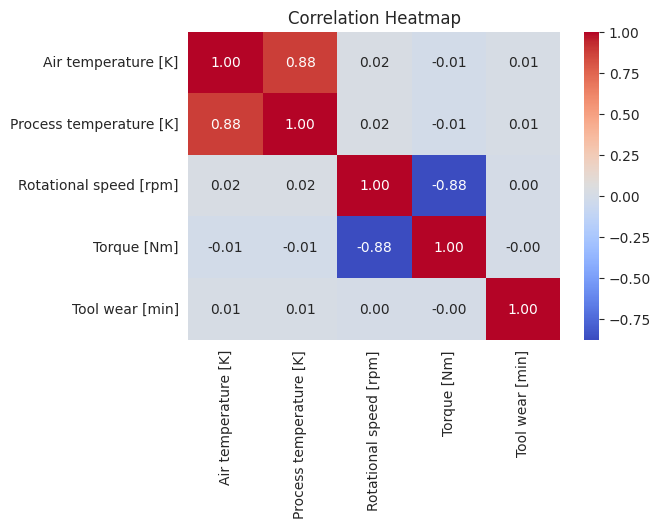

In [53]:
# Correlation heatmap for numerical features
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

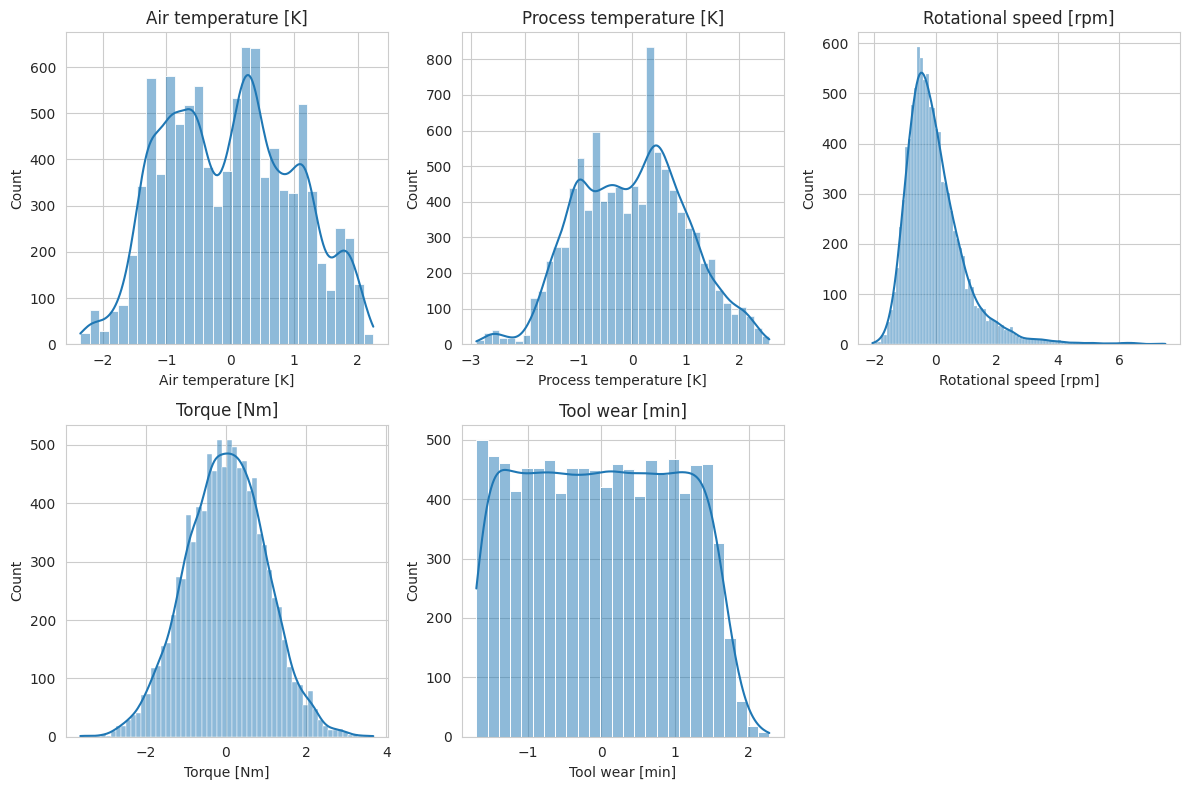

In [54]:
# Distribution plots for numerical features (frequency)
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [55]:
#show classes
unique_classes = df['Failure Type'].unique()
print("Unique Classes:")
print(unique_classes)
print("Number of Classes:", len(unique_classes))

Unique Classes:
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']
Number of Classes: 6


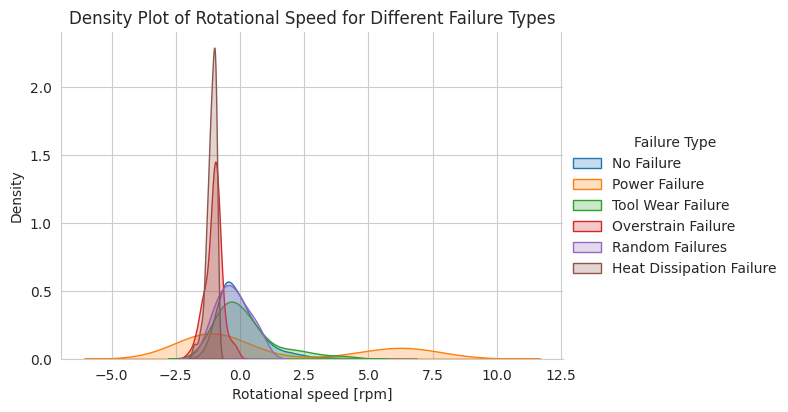

In [57]:
sns.FacetGrid(df, hue = "Failure Type", height=4, aspect=1.5).map(sns.kdeplot, "Rotational speed [rpm]", fill=True).add_legend()
plt.title("Density Plot of Rotational Speed for Different Failure Types")
plt.show()

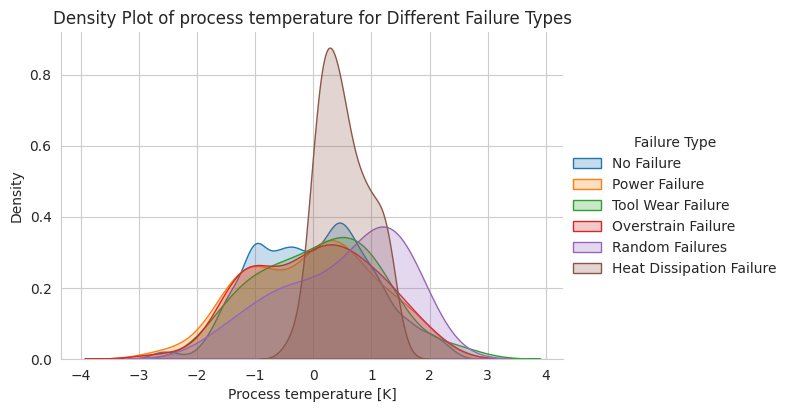

In [58]:
sns.FacetGrid(df, hue = "Failure Type", height=4, aspect=1.5).map(sns.kdeplot, "Process temperature [K]", fill=True).add_legend()
plt.title("Density Plot of process temperature for Different Failure Types")
plt.show()

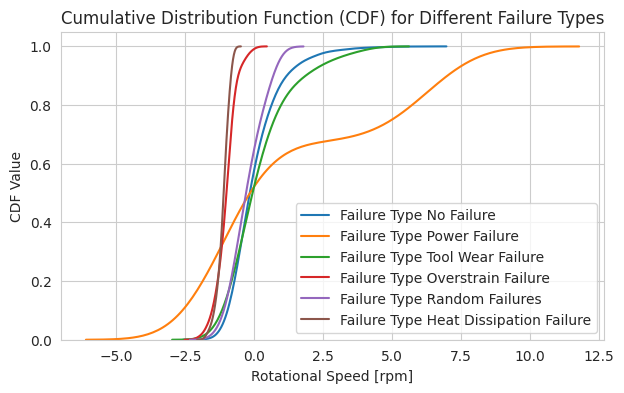

In [110]:
plt.figure(figsize=(7, 4))

for failure_type in df['Failure Type'].unique():
    data_subset = df[df['Failure Type'] == failure_type]['Rotational speed [rpm]']
    sns.kdeplot(data_subset, cumulative=True, label=f'Failure Type {failure_type}')


plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('CDF Value')
plt.title('Cumulative Distribution Function (CDF) for Different Failure Types')
plt.legend()


plt.show()

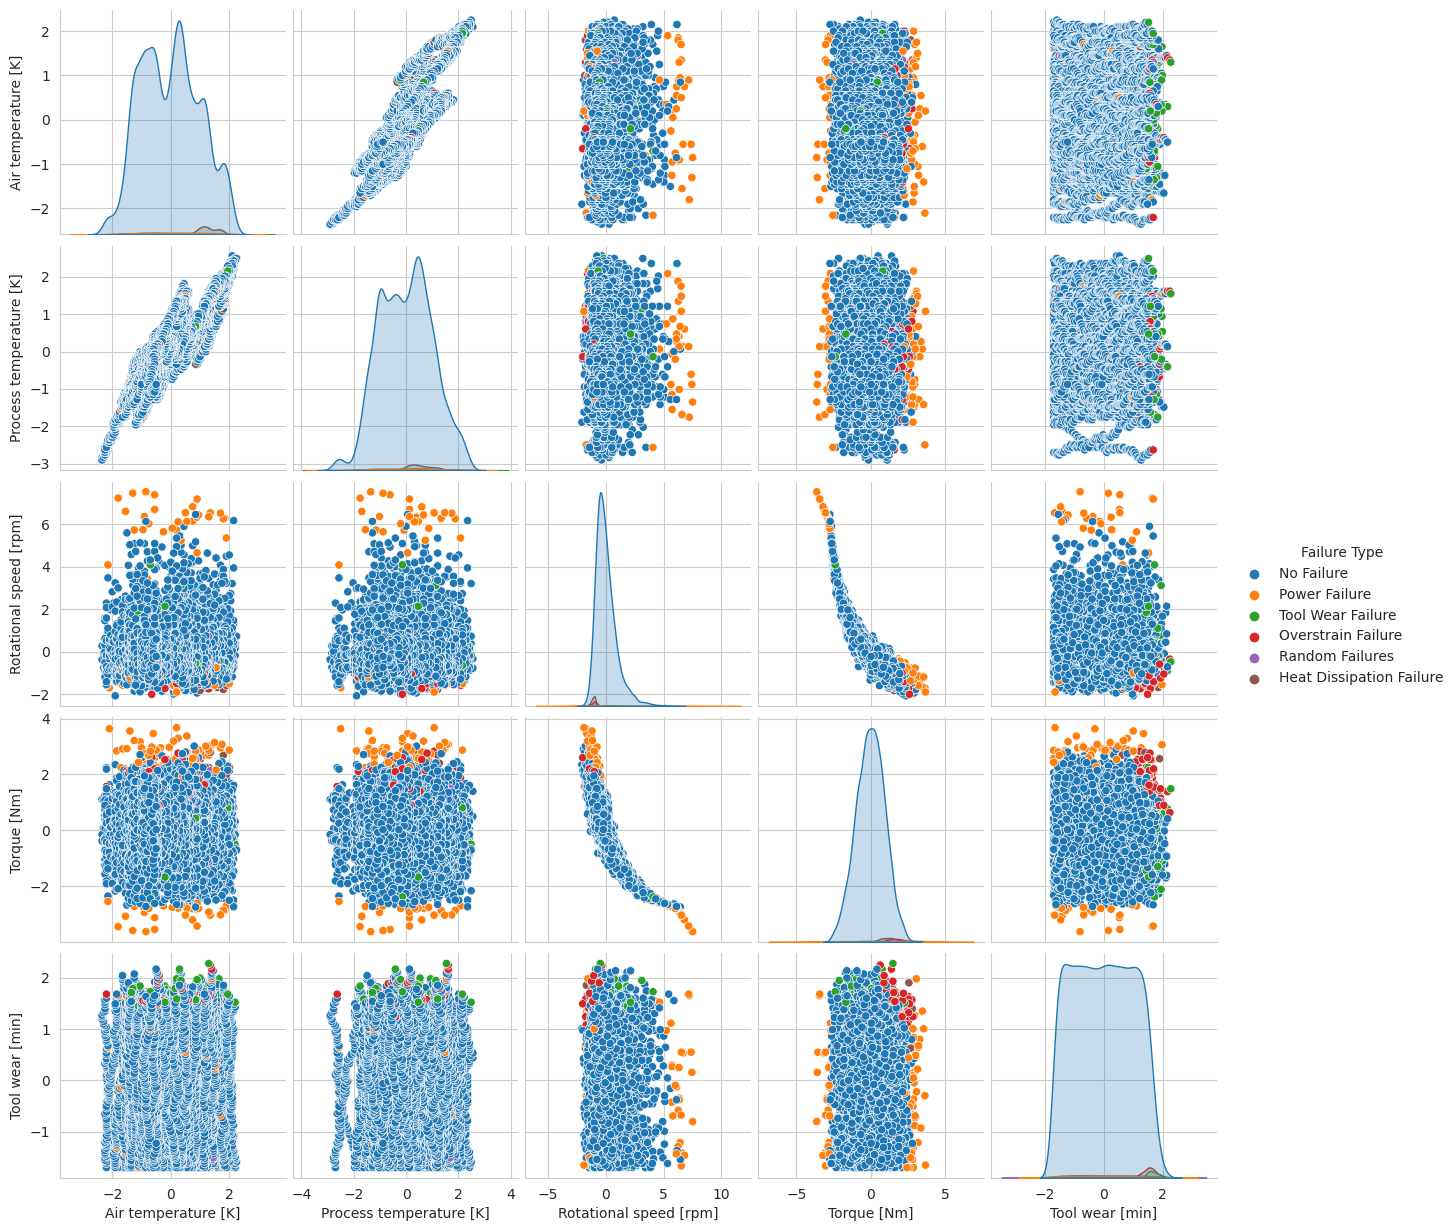

In [62]:
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'Failure Type')
plt.show()

In [63]:
#data augmentation of numerical columns
#Apply random noise to numerical columns
df[numerical_cols] += np.random.normal(0, 0.1, size=(len(df), len(numerical_cols)))

In [64]:
numerical_cols

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [27]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,-1.008824,-0.990018,-0.028614,0.325057,-1.630776,No Failure
1,L,-0.986894,-0.878869,-0.787625,0.561941,-1.694494,No Failure
2,L,-0.972498,-1.009451,-0.226905,0.891475,-1.728677,No Failure
3,L,-0.845966,-0.933023,-0.736947,0.010876,-1.587657,No Failure
4,L,-0.999406,-0.808107,-0.785252,-0.077125,-1.789845,No Failure


In [65]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# Apply label encoding to the 'Type' column
label_encoder = LabelEncoder()
df['Type_encoded'] = label_encoder.fit_transform(df['Type'])

# Separate features (X) and target variable (y) after label encoding
X = df.drop(columns=['Failure Type', 'Type'])  # Features
y = df['Failure Type']  # Target variable

# Create a pipeline with SMOTE and RandomUnderSampler
resampling_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rus', RandomUnderSampler(random_state=42))
])

X_balanced, y_balanced = resampling_pipeline.fit_resample(X, y)




In [66]:
#balanced features
X_balanced

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_encoded
0,0.445823,-0.387691,-1.166427,2.298800,0.099858,2
1,1.361637,0.653003,-0.893835,0.542016,1.002127,1
2,1.089837,0.527359,-0.816183,0.735967,-1.628251,1
3,1.052232,0.630525,-0.776761,1.063040,-1.128117,1
4,1.223410,0.579438,-1.038217,0.330144,-0.703246,2
...,...,...,...,...,...,...
57907,0.048499,1.085685,-0.011313,-0.129724,1.791738,1
57908,-0.464594,0.005532,3.775691,-2.089167,1.722880,1
57909,-1.281679,-1.199110,0.050174,-0.278749,1.731677,1
57910,1.804025,1.496798,-0.538550,0.650045,2.030562,1


In [67]:
y_balanced

0        Heat Dissipation Failure
1        Heat Dissipation Failure
2        Heat Dissipation Failure
3        Heat Dissipation Failure
4        Heat Dissipation Failure
                   ...           
57907           Tool Wear Failure
57908           Tool Wear Failure
57909           Tool Wear Failure
57910           Tool Wear Failure
57911           Tool Wear Failure
Name: Failure Type, Length: 57912, dtype: object

In [68]:
y_balanced.value_counts()  #how many classes


Heat Dissipation Failure    9652
No Failure                  9652
Overstrain Failure          9652
Power Failure               9652
Random Failures             9652
Tool Wear Failure           9652
Name: Failure Type, dtype: int64

In [69]:
df['Type_encoded'].value_counts()

1    6000
2    2997
0    1003
Name: Type_encoded, dtype: int64

In [70]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Type_encoded
0,M,-0.966538,-0.815944,0.005133,0.189497,-1.513600,No Failure,2
1,L,-0.917075,-0.771817,-0.732844,0.499115,-1.431095,No Failure,1
2,L,-0.798650,-0.987253,-0.345610,0.996361,-1.701740,No Failure,1
3,L,-0.915216,-1.136836,-0.572682,-0.189037,-1.600784,No Failure,1
4,L,-0.818110,-0.848470,-0.668145,0.101006,-1.511058,No Failure,1


In [71]:
df


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Type_encoded
0,M,-0.966538,-0.815944,0.005133,0.189497,-1.513600,No Failure,2
1,L,-0.917075,-0.771817,-0.732844,0.499115,-1.431095,No Failure,1
2,L,-0.798650,-0.987253,-0.345610,0.996361,-1.701740,No Failure,1
3,L,-0.915216,-1.136836,-0.572682,-0.189037,-1.600784,No Failure,1
4,L,-0.818110,-0.848470,-0.668145,0.101006,-1.511058,No Failure,1
...,...,...,...,...,...,...,...,...
9995,M,-0.505487,-1.148867,0.406448,-1.337303,-1.358371,No Failure,2
9996,H,-0.533526,-1.080480,0.463562,-0.759529,-1.329095,No Failure,0
9997,M,-0.555586,-0.711873,0.686732,-0.669202,-1.225609,No Failure,2
9998,H,-0.496496,-1.018445,-0.757494,0.973828,-1.372890,No Failure,0


In [73]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_balanced_encoded = label_encoder.fit_transform(y_balanced)
y_tensor = torch.tensor(y_balanced_encoded, dtype=torch.long)


In [108]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to the target variable
label_encoder = LabelEncoder()
y_balanced_encoded = label_encoder.fit_transform(y_balanced)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_balanced.values, dtype=torch.float32)
y_tensor = torch.tensor(y_balanced_encoded, dtype=torch.long)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the neural network architecture
class ClassificationNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ClassificationNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        return x

# Instantiate the model
input_size = X_train.shape[1]
hidden_size = 64
output_size = len(torch.unique(y_tensor))
model = ClassificationNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Convert tensors to PyTorch DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

train_losses = []
test_losses = []
accuracies = []

# Training the model
num_epochs=30
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Append training loss for this epoch
    train_losses.append(loss.item())

    # Evaluate the model on the test set
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

        # Calculate accuracy on the test set
        accuracy = accuracy_score(all_targets, all_predictions)
        accuracies.append(accuracy)

        #loss
        test_loss = criterion(outputs, targets).item()
        test_losses.append(test_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item()}, Test Loss: {test_loss}, Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/30, Training Loss: 1.6643738746643066, Test Loss: 1.680277943611145, Test Accuracy: 33.95%
Epoch 2/30, Training Loss: 1.5575987100601196, Test Loss: 1.5764352083206177, Test Accuracy: 48.77%
Epoch 3/30, Training Loss: 1.4987916946411133, Test Loss: 1.4864274263381958, Test Accuracy: 56.55%
Epoch 4/30, Training Loss: 1.4172626733779907, Test Loss: 1.405571699142456, Test Accuracy: 60.18%
Epoch 5/30, Training Loss: 1.311373233795166, Test Loss: 1.3300532102584839, Test Accuracy: 63.55%
Epoch 6/30, Training Loss: 1.2617945671081543, Test Loss: 1.258868932723999, Test Accuracy: 65.54%
Epoch 7/30, Training Loss: 1.1890658140182495, Test Loss: 1.1920385360717773, Test Accuracy: 66.71%
Epoch 8/30, Training Loss: 1.1193714141845703, Test Loss: 1.129854440689087, Test Accuracy: 68.00%
Epoch 9/30, Training Loss: 1.066244125366211, Test Loss: 1.072886347770691, Test Accuracy: 69.39%
Epoch 10/30, Training Loss: 1.0095715522766113, Test Loss: 1.021420955657959, Test Accuracy: 70.50%
Epoch 1

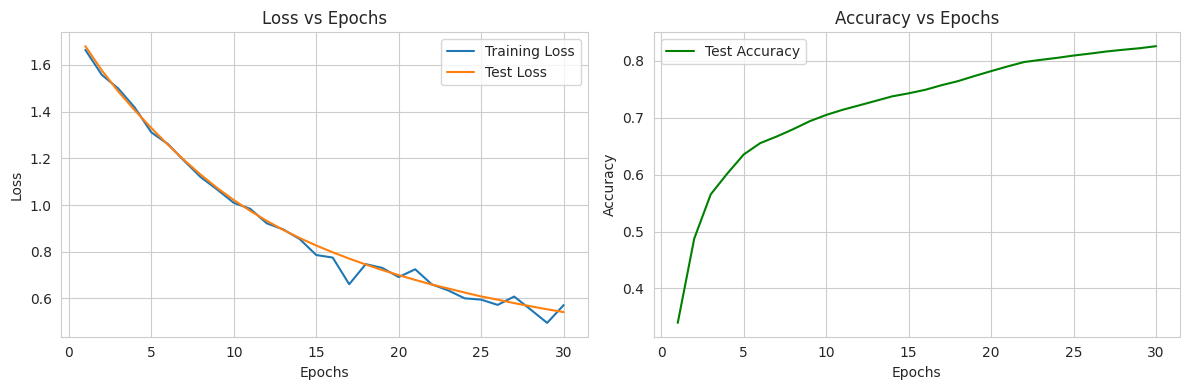

In [109]:
# Plotting Loss vs Epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting Accuracy vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()